In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transport_xrf.constants import *
from typing import Tuple

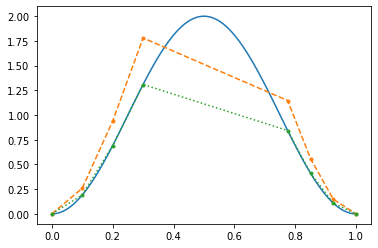

In [3]:
func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1

tsp = np.linspace(0, 1, 100)
dfsp = func_df(tsp)
fig, ax = plt.subplots()
h = ax.plot(tsp, dfsp)

num_steps = 7
# t = np.linspace(0, 1, num_steps + 1)
num_steps_half = int(num_steps/2)
ts = np.append(np.linspace(0, 0.3, num_steps_half + 1), np.linspace(0.7, 1, num_steps - num_steps_half + 1)[1:])
dfs0 = func_df(ts)

phin = np.trapz(dfs0, ts)
# print(phin)
dfn = dfs0/phin
h = ax.plot(ts, dfn, ".--")
h = ax.plot(ts, dfs0, ".:")

1.0


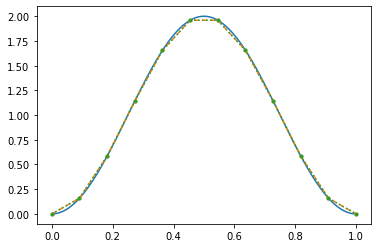

In [4]:
func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1
phin = 1 # rad/(2*pi)
# T = 10e-3 # s
T = 1
num_piece = 11

tsp = np.linspace(0, 1, 1000)*T
dfsp = func_df(tsp/T)*phin/T
fig, ax = plt.subplots()
h = ax.plot(tsp, dfsp)


ts = np.linspace(0, 1, num_piece + 1)*T
dfs0 = func_df(ts/T)*phin/T

phin_desc = np.trapz(dfs0, ts) # expected actual phase of discretized signal
print(phin_desc/phin)
dfn = dfs0*phin_desc/phin
h = ax.plot(ts, dfn, ".--")
h = ax.plot(ts, dfs0, ".:")

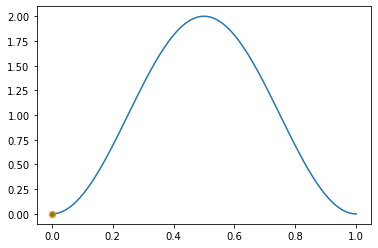

In [5]:
res_df = 0.3 # Hz; resolution of frequency step given by the frequency gain in XPARAM
dt_min = 16e-9 # s; 16 ns


func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1
phin = 1 # rad/(2*pi)
# T = 10e-3 # s
T = 1
num_piece = 20

# digitize in time uniformly by num_dt steps (i.e., num_dt+1 points) 
ts = np.linspace(0, 1, num_piece + 1)*T
dfs0 = func_df(ts/T)*phin/T
qs_df = np.round(dfs0/res_df)*res_df

# skip the steps where the frequency quanta doesn't change
i0 = 0; ts = [ts[0]]; dfs0 = [dfs0[0]]
i = 0
while i < len(ts) - 1:
    i += 1
    if qs_df[i] == qs_df[i0]:
        continue
    ts += [ts[i]]
    dfs0 += [dfs0[i]]
    i0 = i
ts = np.array(ts); dfs0 = np.array(dfs0)

# phin_desc = np.trapz(dfs_dt, ts_dt) # expected actual phase of discretized signal
# print(phin_desc/phin)
# dfn = dfs_dt*phin_desc/phin

tsp = np.linspace(0, 1, 1000)*T
dfsp = func_df(tsp/T)*phin/T
fig, ax = plt.subplots()
h = ax.plot(tsp, dfsp)
h = ax.plot(ts, dfs0, "o--")
h = ax.plot(ts, dfs0, ".:")


Discretization-induced transport distance error: -2.500%


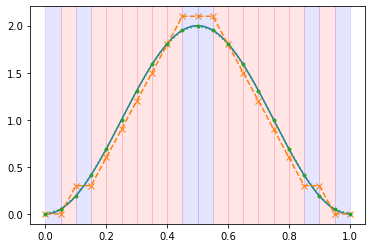

In [6]:
res_df = 0.3 # Hz; min freq step size given by the frequency gain in XPARAM
dt_min = 16e-9 # s; 16 ns


func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1
phin = 1 # rad/(2*pi)
# T = 10e-3 # s
T = 1
num_piece = 20

# digitize in time uniformly by num_dt steps (i.e., num_dt+1 points) 
ts = np.linspace(0, 1, num_piece + 1)*T
dfs0 = func_df(ts/T)*phin/T
qs_df = np.round(dfs0/res_df)
dfqs = qs_df*res_df

# skip the steps where the frequency quanta doesn't change
is_ramp_array = np.full(num_piece, False) # assign if the entry for i-th bin is a ramp (True) or a hold (False)
i0 = 0
i = 0
while i < num_piece:
    i += 1
    if qs_df[i] == qs_df[i0]:
        continue
    is_ramp_array[i-1] = True
    i0 = i
ts = np.array(ts); dfs0 = np.array(dfs0)

phin_qauntized = np.trapz(dfqs, ts) # expected actual phase of discretized signal
error = phin_qauntized/phin - 1

print(f"Discretization-induced transport distance error: {error*1e2:.3f}%")
dfs_quantized_dt_norm = dfqs*phin_qauntized/phin

tsp = np.linspace(0, 1, 1000)*T
dfsp = func_df(tsp/T)*phin/T
fig, ax = plt.subplots()
h = ax.plot(tsp, dfsp)
h = ax.plot(ts, dfqs, "x--")
h = ax.plot(ts, dfs0, ".:")

for i, is_ramp in enumerate(is_ramp_array):
    if is_ramp:
        h = ax.axvspan(ts[i], ts[i+1], color="red", alpha=0.1)
    else:
        h = ax.axvspan(ts[i], ts[i+1], color="blue", alpha=0.1)




Discretization-induced transport distance error: -2.500%


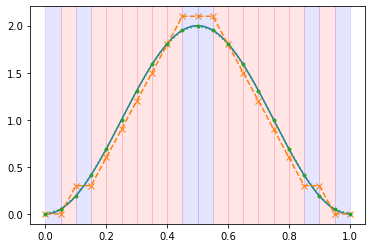

In [7]:
res_df = 0.3 # Hz; min freq step size given by the frequency gain in XPARAM
# df = DDS_FREQ_STEP*2**freq_gain # Hz; min freq step size given by the frequency gain in XPARAM
# dt_min = 16e-9 # s; 16 ns


func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1
phin = 1 # rad/(2*pi)
# T = 10e-3 # s
T = 1
num_piece = 20

# digitize in time uniformly by num_piece steps (i.e., num_dt+1 points)
dt = T / num_piece
ts = np.linspace(0, 1, num_piece + 1)*T
dfs0 = func_df(ts/T)*phin/T
qs_df = np.round(dfs0/res_df) # quanta of df (i.e., integer multiples of df_min)
dfqs = qs_df*res_df # quantized df

dfs = dfqs # final df to use

phin_qauntized = np.trapz(dfqs, ts) # expected actual phase of discretized signal
error = phin_qauntized/phin - 1
print(f"Discretization-induced transport distance error: {error*1e2:.3f}%")
dfs_quantized_dt_norm = dfqs*phin_qauntized/phin

tsp = np.linspace(0, 1, 1000)*T
dfsp = func_df(tsp/T)*phin/T
fig, ax = plt.subplots()
h = ax.plot(tsp, dfsp)
h = ax.plot(ts, dfs, "x--")
h = ax.plot(ts, dfs0, ".:")



is_ramp_array = np.full(num_piece, False) # assign if the entry for i-th bin is a ramp (True) or a hold (False)
i0 = 0
i = 0
while i < num_piece:
    i += 1
    if qs_df[i] == qs_df[i0]:
        continue
    is_ramp_array[i-1] = True
    i0 = i

for i, is_ramp in enumerate(is_ramp_array):
    if is_ramp:
        h = ax.axvspan(ts[i], ts[i+1], color="red", alpha=0.1)
    else:
        h = ax.axvspan(ts[i], ts[i+1], color="blue", alpha=0.1)




In [8]:

def _get_ramp_arguments(T: float, dfi: float, dff: float, res_df: float) -> Tuple[float, float]:
    """Return the argument values to pass in TABLE,RAMP entry.

    Args:
        T (float): duration of the ramp
        dfi (float): initial frequency deviation
        dff (float): final frequency deviation
        res_df (float): frequency control resolution

    Returns:
        (float, float): update period and number of updates
    """
    # frequency quanta
    qfi = round(dfi/res_df); qff = round(dff/res_df); qf = qff - qfi
    # time quanta
    qt = round(T / XPARAM_MIN_DURATION)
    if qf >= qt:
        # freq change per time resolution is not smaller than the min freq control resolution
        # set update period to be time resolution
        update_period = XPARAM_MIN_DURATION
        num_update = qt
    else:
        # set update period to be a minimal multiple of the time resolution s.t. time quanta are smaller than freq quanta
        multiplier = np.ceil(qt/qf)
        update_period = multiplier*XPARAM_MIN_DURATION
        num_update = round(T/dt)
        
    # if t_ramp_step < 1e-6:
    #     t_ramp_step = 1e-6
    #     ramp_step_num = round(t_ramp/t_ramp_step)
    
    return update_period, num_update

def _get_table_entry(T: float, dfi: float, dff: float, res_df: float) -> Tuple[str, bool]:
    """Return proper table entry for a given arguments

    Args:
        T (float): duration of the entry
        dfi (float): initial frequency deviation
        dff (float): final frequency deviation
        res_df (float): frequency control resolution

    Returns:
        (str, bool): command string and ramp flag
    """
    # frequency quanta
    qfi = round(dfi/res_df); qff = round(dff/res_df); qf = qff - qfi
    if qf == 0:
        # if there is no change in the discretized frequency, return "hold" entry (a command for constant freq)
        f = BASE_FREQUENCY + dfi
        cmd = f"TABLE,APPEND,1,FREQ,{f}Hz,{T*1e6}us"; is_ramp = False
    else:
        # if there is the frequency change, return "ramp" entry  (a command for ramping freq)
        fi = BASE_FREQUENCY + dfi; ff = BASE_FREQUENCY + dff
        update_period, num_update = _get_ramp_arguments(T, dfi, dff, res_df)
        cmd = f"TABLE,RAMP,1,FREQ,{fi}Hz,{ff}Hz,{update_period*1e6}us,{num_update}"; is_ramp = True
    
    return cmd, is_ramp
    
def _get_transport_entries(func_df: callable, T: float, phin: float, num_piece: int):
    """
    Return transport entries for a given transport function and parameters. The function is approximated to the piecewise linear functions.

    Args:
        func_df (callable): function for frequency deviation vs time
        T (float): transport duration
        phin (float): lattice phase to be transported, normalized by 2*pi
        num_piece (int): number of time pieces to divide the function

    Returns:
        (str, np.ndarray, np.ndarray): script for the transport, quantized frequency deviations, and ramp flag array
    """
    # digitize in time uniformly by num_piece steps (i.e., num_dt+1 points)
    dt = T / num_piece
    ts = np.linspace(0, 1, num_piece + 1)*T
    dfs0 = func_df(ts/T)*phin/T
    qs_df = np.round(dfs0/res_df) # quanta of df (i.e., integer multiples of df_min)
    dfqs = qs_df*res_df # quantized df
    dfs = dfqs # final df to use

    # >>> get table entries for a transports >>>
    # first entry to wait for trigger
    script = f"TABLE,APPEND,1,FREQ,{BASE_FREQUENCY}Hz,1us,TRIGDR" + "\n"
    # entries for transport
    is_ramp_array = np.full(num_piece, None)
    for i in range(num_piece):
        # transport entries for each time piece
        cmd, is_ramp = _get_table_entry(dt, dfi=dfs[i], dff=dfs[i+1], res_df=res_df)
        is_ramp_array[i] = is_ramp
        script += cmd + "\n"
    # <<< get table entries for a transports <<<
    
    return script, dfs, is_ramp_array



Discretization-induced transport distance error: -2.500%

TABLE,APPEND,1,FREQ,111200000.0Hz,100000.0us
TABLE,RAMP,1,FREQ,111200000.0Hz,111200000.3Hz,100000.0us,1
TABLE,APPEND,1,FREQ,111200000.3Hz,100000.0us
TABLE,RAMP,1,FREQ,111200000.3Hz,111200000.6Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200000.6Hz,111200000.9Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200000.9Hz,111200001.2Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200001.2Hz,111200001.5Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200001.5Hz,111200001.8Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200001.8Hz,111200002.1Hz,100000.0us,1
TABLE,APPEND,1,FREQ,111200002.1Hz,100000.0us
TABLE,APPEND,1,FREQ,111200002.1Hz,100000.0us
TABLE,RAMP,1,FREQ,111200002.1Hz,111200001.8Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200001.8Hz,111200001.5Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200001.5Hz,111200001.2Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200001.2Hz,111200000.9Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200000.9Hz,111200000.6Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200000.6Hz,111200000.3Hz,-10

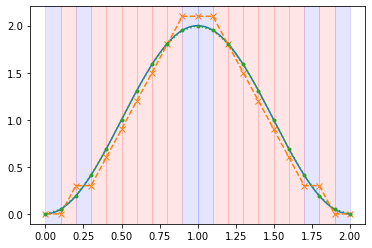

In [9]:
res_df = 0.3 # Hz; min freq step size given by the frequency gain in XPARAM
# res_df = DDS_FREQ_STEP*2**freq_gain # Hz; min freq step size given by the frequency gain in XPARAM

func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1
phin = 2 # rad/(2*pi)
# T = 10e-3 # s
T = 2
num_piece = 20

# digitize in time uniformly by num_piece steps (i.e., num_dt+1 points)
dt = T / num_piece
ts = np.linspace(0, 1, num_piece + 1)*T
dfs0 = func_df(ts/T)*phin/T
qs_df = np.round(dfs0/res_df) # quanta of df (i.e., integer multiples of df_min)
dfqs = qs_df*res_df # quantized df

dfs = dfqs # final df to use

is_ramp_array = np.full(num_piece, None)
cmds = np.full(num_piece, None)
for i in range(num_piece):
    cmd, is_ramp = _get_table_entry(dt, dfi=dfs[i], dff=dfs[i+1], res_df=res_df)
    cmds[i] = cmd; is_ramp_array[i] = is_ramp
    
# plot
fig, ax = plt.subplots()
tsp = np.linspace(0, 1, 1000)*T
dfsp = func_df(tsp/T)*phin/T
h = ax.plot(tsp, dfsp)
h = ax.plot(ts, dfs, "x--")
h = ax.plot(ts, dfs0, ".:")


for i, is_ramp in enumerate(is_ramp_array):
    if is_ramp:
        h = ax.axvspan(ts[i], ts[i+1], color="red", alpha=0.1)
    else:
        h = ax.axvspan(ts[i], ts[i+1], color="blue", alpha=0.1)

phin_qauntized = np.trapz(dfqs, ts) # expected actual phase of discretized signal
error = phin_qauntized/phin - 1
print(f"Discretization-induced transport distance error: {error*1e2:.3f}%")
print()
        
print("\n".join(cmds))


Discretization-induced transport distance error: -2.500%

TABLE,APPEND,1,FREQ,111200000.0Hz,1us,TRIGDR
TABLE,APPEND,1,FREQ,111200000.0Hz,100000.0us
TABLE,RAMP,1,FREQ,111200000.0Hz,111200000.3Hz,100000.0us,1
TABLE,APPEND,1,FREQ,111200000.3Hz,100000.0us
TABLE,RAMP,1,FREQ,111200000.3Hz,111200000.6Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200000.6Hz,111200000.9Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200000.9Hz,111200001.2Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200001.2Hz,111200001.5Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200001.5Hz,111200001.8Hz,100000.0us,1
TABLE,RAMP,1,FREQ,111200001.8Hz,111200002.1Hz,100000.0us,1
TABLE,APPEND,1,FREQ,111200002.1Hz,100000.0us
TABLE,APPEND,1,FREQ,111200002.1Hz,100000.0us
TABLE,RAMP,1,FREQ,111200002.1Hz,111200001.8Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200001.8Hz,111200001.5Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200001.5Hz,111200001.2Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200001.2Hz,111200000.9Hz,-100000.0us,1
TABLE,RAMP,1,FREQ,111200000.9Hz,111200000.6Hz,-100000.0us,1
TABL

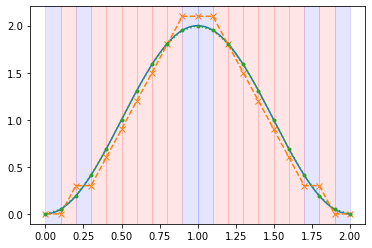

In [10]:
res_df = 0.3 # Hz; min freq step size given by the frequency gain in XPARAM
# res_df = DDS_FREQ_STEP*2**freq_gain # Hz; min freq step size given by the frequency gain in XPARAM

func_df = lambda t: 2*np.sin(np.pi*t)**2 # freq deviation normalized time and phase => area=\phi/(2*\pi)=1 during t=0..1
phin = 2 # rad/(2*pi)
# T = 10e-3 # s
T = 2
num_piece = 20

ts = np.linspace(0, 1, num_piece + 1)*T
script, dfs, is_ramp_array = _get_transport_entries(func_df, T, phin, num_piece)

# plot
fig, ax = plt.subplots()
tsp = np.linspace(0, 1, 1000)*T
dfsp = func_df(tsp/T)*phin/T
h = ax.plot(tsp, dfsp)
h = ax.plot(ts, dfs, "x--")
h = ax.plot(ts, dfs0, ".:")

for i, is_ramp in enumerate(is_ramp_array):
    if is_ramp:
        h = ax.axvspan(ts[i], ts[i+1], color="red", alpha=0.1)
    else:
        h = ax.axvspan(ts[i], ts[i+1], color="blue", alpha=0.1)

phin_qauntized = np.trapz(dfqs, ts) # expected actual phase of discretized signal
error = phin_qauntized/phin - 1
print(f"Discretization-induced transport distance error: {error*1e2:.3f}%")
print()
        
print(script)
